Importing the required packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Web Scraping the US Treasury Yields

In [2]:
url='https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022'
page=requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
table1 = soup.find('table')
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title)
mydata = pd.DataFrame(columns = headers)
mydata=mydata.dropna(how='any',axis=0)
for j in table1.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row
mydata=mydata.drop(columns='4 Mo')
x=mydata.iloc[0:,10:]
x=x.astype(str).astype(float)



    

Yield Curve

Text(0, 0.5, 'Yield')

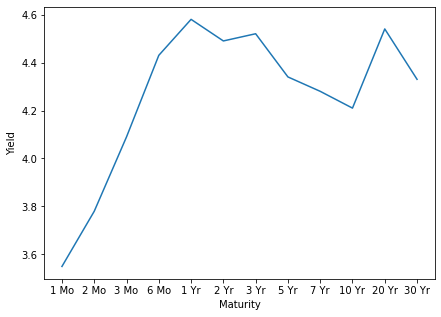

In [3]:
t=mydata.iloc[-1]
t=t[10:]
t=t.astype(str).astype(float)
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t)
plt.xlabel('Maturity')
plt.ylabel('Yield')

Daily Treasury Par Yield Curve Rates

Text(0, 0.5, 'Yield')

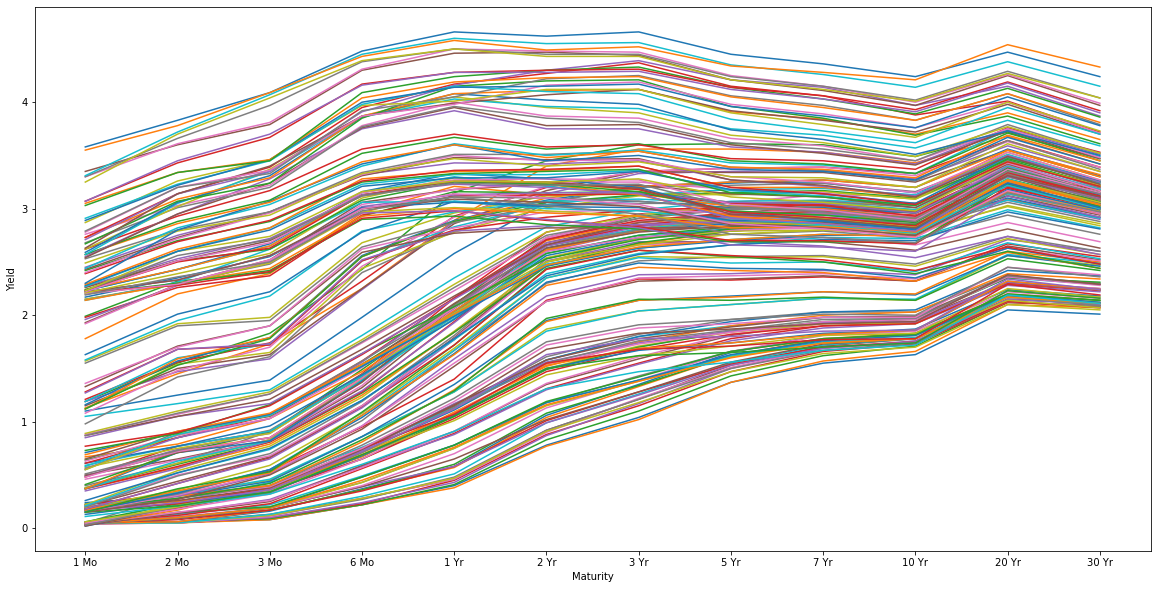

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x.transpose())
plt.xlabel('Maturity')
plt.ylabel('Yield')



US Treasury Time Series Graph

Text(0, 0.5, 'Yield')

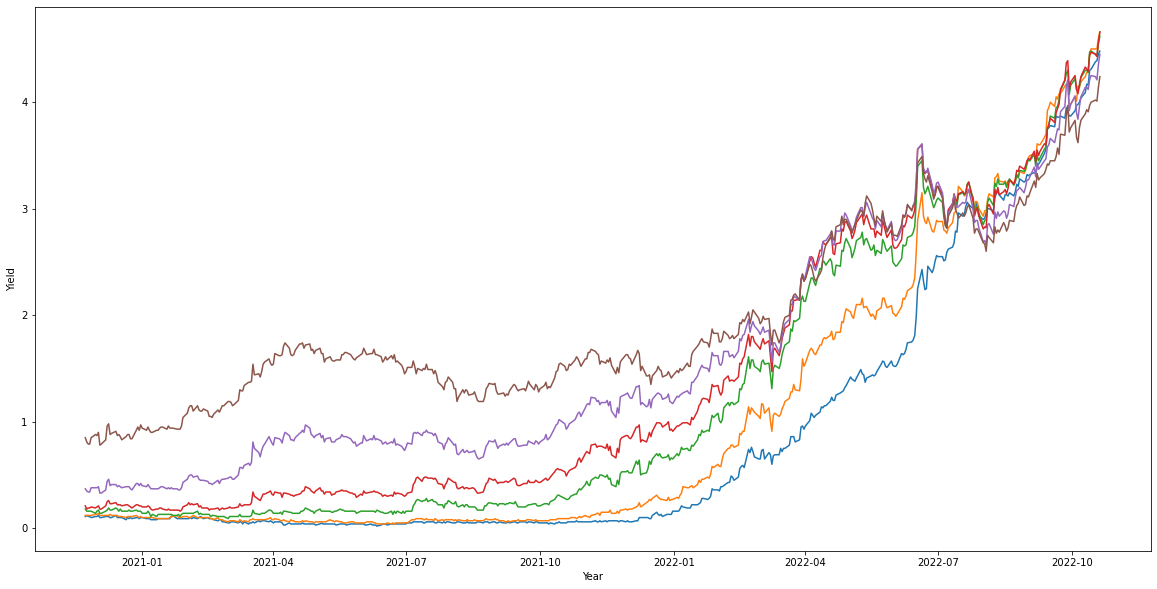

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/RishikeshMahadevan/US-Treasury-Yield-Curve-plot-using-WebScrapping/main/daily-treasury-rates-historical.csv')

x=df['Date']
df.drop(df.tail(10).index,inplace = True)
df = df.dropna(axis=1)
df=df.drop(columns='Date')
df=df.astype(str).astype(float)
date=pd.bdate_range(start='1/2/1990', end='10/21/2022')[::-1]
g=df.iloc[1:500,::]
g['date']=date[1:500]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(g.date,g[['6 Mo','1 Yr','2 Yr','3 Yr','5 Yr','10 Yr']])
plt.xlabel('Year')
plt.ylabel('Yield')

